In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
import matplotlib.lines as mlines

sns.set(font_scale=1, rc={'text.usetex': True})
sns.set_style("whitegrid")


In [25]:
pal = sns.color_palette("husl", 2)
flatui = pal.as_hex()

### 2-Player social dilemmas

In [60]:
def plot_2player_sd(df, name):
    ax = sns.lineplot(data=df,
              x='episode',
              y='reward',
              hue='Game Type',
              #hue_order=['Markov Game', 'Sanction Game'],
              palette=flatui
              )

    #h,l = ax.get_legend_handles_labels()
    #plt.legend(h[0:4]+h[5:],l[0:4]+l[5:])
    ax.set(xlabel='Episode', ylabel='Return')
    plt.show()
    #plt.savefig('{}.pdf'.format(name))
    plt.close()
    
    
def get_env_data_sd(env):
    log_str = '{}.csv'.format(env)
    envs = {'PD': 'Prisoner\'s Dilemma', 'SH': 'Stag Hunt', 'CH': 'Chicken'}
    log_dir = os.path.join('exps', 'evolution_strategies', log_str)
    df = None
    if os.path.exists(log_dir):
        df = pd.read_csv(log_dir)
        #df.loc[df['setting'] == 'Stochastic Market Game', 'setting'] = '{} with Sanctions'.format(envs[env])
        #df.loc[df['setting'] == 'Markov Game', 'setting'] = '{} no Sanctions'.format(envs[env])
        df['reward'] = (df.reward-df.reward.min())/(df.reward.max()-df.reward.min())
        df = df.rename(columns={"setting": "Game Type"})
        df['env'] = env
        df = df[df['agent']=='sum']
    return df

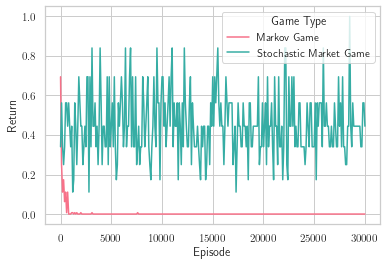

In [63]:
envs = ['n_player_prisoners_dilemma']
for env in envs:
    df_new = get_env_data_sd(env)
    plot_2player_sd(df_new, env)

In [18]:
df_new.head()

,Unnamed: 0,run,episode,Game Type,agent,reward,price,share_cooperators,successful_sanction_c,successful_sanction_d,C-,D-,CC,CD,DC,DD,env
0,1,0,0,Prisoner's Dilemma no Sanctions,sum,0.0,-2.0,0.0,0,0,0.0,2.0,0.0,0.0,0.0,0.0,PD
1,101,0,100,Prisoner's Dilemma no Sanctions,sum,1.0,-2.0,1.0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,PD
2,201,0,200,Prisoner's Dilemma no Sanctions,sum,0.5,-2.0,0.5,0,0,1.0,1.0,0.0,0.0,0.0,0.0,PD
3,301,0,300,Prisoner's Dilemma no Sanctions,sum,0.0,-2.0,0.0,0,0,0.0,2.0,0.0,0.0,0.0,0.0,PD
4,401,0,400,Prisoner's Dilemma no Sanctions,sum,0.0,-2.0,0.0,0,0,0.0,2.0,0.0,0.0,0.0,0.0,PD
